In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [18]:
ccpp = pd.read_excel("Downloads/Folds5x2_pp.xlsx")
ccpp

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [20]:
#Rename Columns to make them better descriptive and unddable
rename_columns = ccpp.rename(columns = {"V": "Exhaust_Vacuum", "AP": "Ambient_Pressure", "RH": "Relative_Humidity", "AT": "Temperature", "PE": "Electricity_output"})
rename_columns

,Temperature,Exhaust_Vacuum,Ambient_Pressure,Relative_Humidity,Electricity_output
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [19]:
#Check for missing Values in the dataset
ccpp.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [21]:
rename_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Temperature         9568 non-null   float64
 1   Exhaust_Vacuum      9568 non-null   float64
 2   Ambient_Pressure    9568 non-null   float64
 3   Relative_Humidity   9568 non-null   float64
 4   Electricity_output  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [23]:
rename_columns.describe()

,Temperature,Exhaust_Vacuum,Ambient_Pressure,Relative_Humidity,Electricity_output
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


{'whiskers': [<matplotlib.lines.Line2D at 0x7f9bfb76ebe0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9bfb75b340>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9bfb76e850>,
 'medians': [<matplotlib.lines.Line2D at 0x7f9bfb75ba60>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9bfb75bdf0>,
 'means': []}

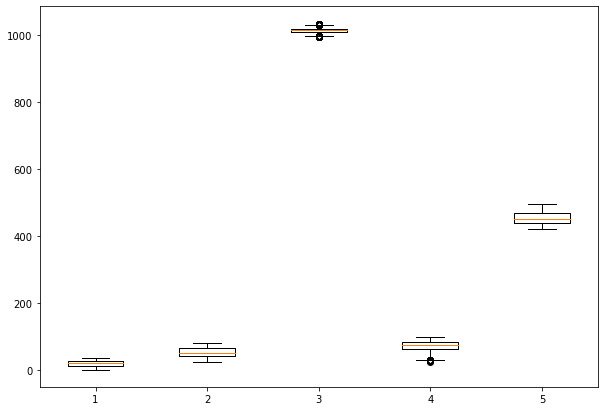

In [28]:
#Check for Outliers of any sort
fig = plt.figure(figsize = (10, 7))
plt.boxplot(rename_columns)

In [30]:
rename_columns.shape

(9568, 5)

Text(0.5, 1.0, 'Electricity_output VS Relative_Humidity')

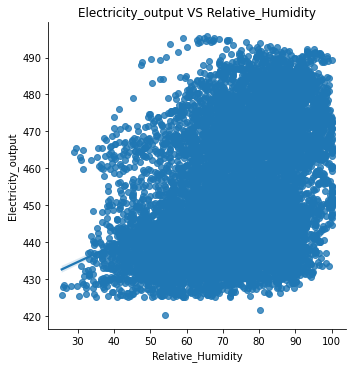

In [32]:
fig= sns.lmplot(x = 'Relative_Humidity', y='Electricity_output',data=rename_columns)
plt.title("Electricity_output VS Relative_Humidity")

Text(0.5, 1.0, 'Ambient_Pressure VS Electrical_output')

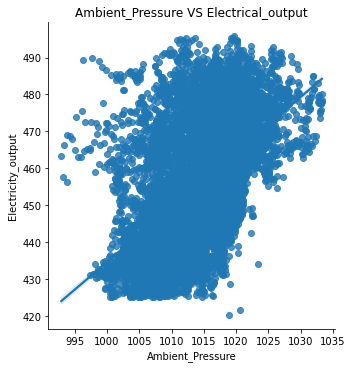

In [35]:
fig= sns.lmplot(x = 'Ambient_Pressure', y='Electricity_output',data=rename_columns)
plt.title("Ambient_Pressure VS Electrical_output")

Text(0.5, 1.0, 'Electricity_output VS Temperature')

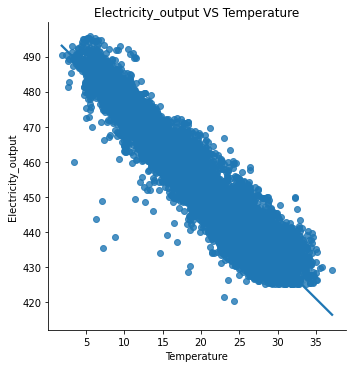

In [37]:
fig= sns.lmplot(x = 'Temperature', y='Electricity_output',data=rename_columns)
plt.title("Electricity_output VS Temperature")

Text(0.5, 1.0, 'Electricity_output VS Exhaust_Vacuum')

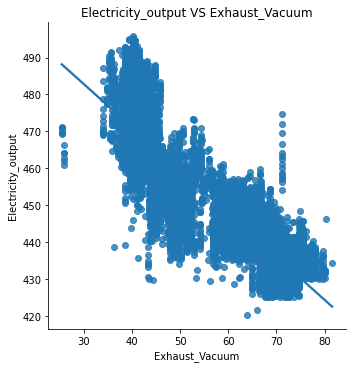

In [38]:
fig= sns.lmplot(x = 'Exhaust_Vacuum', y='Electricity_output',data=rename_columns)
plt.title("Electricity_output VS Exhaust_Vacuum")

<AxesSubplot:>

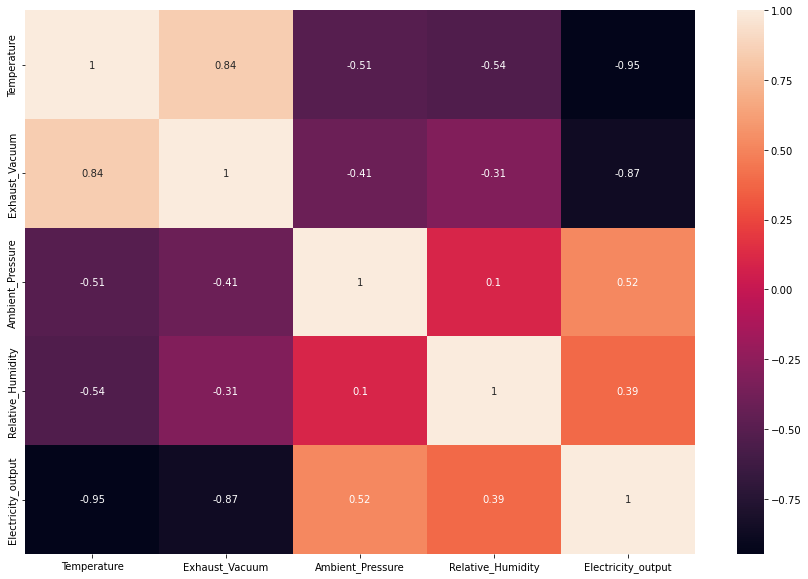

In [39]:
##HeatMap Can also be used to check the correlation between the dependent variable and the Independent variable
plt.figure(figsize=(15, 10))
sns.heatmap(rename_columns.corr(), annot=True)

In [42]:
y = rename_columns['Electricity_output']
x = rename_columns.drop(columns=['Electricity_output'], axis=1)
y.shape
x.shape

(9568, 4)

In [44]:
#Splitting the DataSet into Train and Test. The second Train and Set will be used for validation
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=45)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [46]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=1, max_depth=4)
model.fit(rename_columns,x)

RandomForestRegressor(max_depth=4, random_state=1)


RandomForestRegressor(max_depth=4, random_state=1)

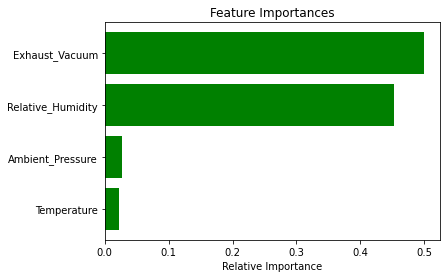

In [59]:
features = rename_columns.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-4:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [63]:
model = LinearRegression()
power_output = model.fit(X_val, y_val)
power_output

LinearRegression()

In [62]:
coef_deter = power_output.score(X_val, y_val)
coef_deter

0.9260043425552649

In [65]:
1 - (1-model.score(X_val, y_val)) * (len(y_val)-1)/(len(y_val)-X_val.shape[1]-1)

0.9258492966517662

In [66]:
intercept = model.coef_
intercept

array([-1.95055325, -0.25198534,  0.04622899, -0.14211512])

In [72]:
X_predict = power_output.predict(X_test)
X_predict

array([438.36393419, 434.31425702, 461.22586168, ..., 443.53943806,
       462.61599393, 432.95903016])

In [97]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("MAE : ",mean_absolute_error(y_test, X_predict))
print("MSE : ", mean_squared_error(y_test, X_predict))
print("R2 Sore : ", r2_score(y_test, X_predict))


MAE :  3.602511886092964
MSE :  19.698243068659963
R2 Sore :  0.9297200480561563


In [80]:
from sklearn.linear_model import Ridge

In [90]:
model_ = Ridge()
power_output = model_.fit(X_val, y_val)
power_output

Ridge()

In [94]:
coef_deter = power_output.score(X_val, y_val)
coef_deter

0.9260043421896036

In [95]:
1 - (1-model_.score(X_val, y_val)) * (len(y_val)-1)/(len(y_val)-X_val.shape[1]-1)

0.9258492962853387

In [93]:
intercept = model_.coef_
intercept

array([-1.95044578, -0.25202519,  0.04625659, -0.14209695])

In [85]:
X_predict = power_output.predict(X_test)
X_predict

array([438.36389903, 434.31461065, 461.22595597, ..., 443.53994324,
       462.61607985, 432.95879972])

In [96]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("MAE : ",mean_absolute_error(y_test, X_predict))
print("MSE : ", mean_squared_error(y_test, X_predict))
print("R2 Sore : ", r2_score(y_test, X_predict))

MAE :  3.602511886092964
MSE :  19.698243068659963
R2 Sore :  0.9297200480561563
